# House Value Prediction Model Selection
This notebook is used to perform Model Selection on the dataset provided by the real estate agency\
Each model used in this notebook is instantiated using the default parameters\
The evaluation metrics used are:
1. Root Mean Square Error (**RMSE**)
2. Mean Absolute Percentage Error (**MAPE**)

# Install Dependecies

In [1]:
%pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load the Training Dataset

In [2]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

dataset_path = Path("../../dataset/processed/California_Houses_Processed.csv") # Change this to the path of your dataset

houses_df = pd.read_csv(dataset_path)

# Training Data
x = houses_df.drop(columns=["Median_House_Value"], inplace=False)
# Target (Label)
y = houses_df["Median_House_Value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(f'Dataset shape: {houses_df.shape}')
print(f'X train shape: {x_train.shape}')
print(f'Y train shape: {y_train.shape}')

houses_df["Median_House_Value"].describe()

Dataset shape: (20640, 15)
X train shape: (16512, 14)
Y train shape: (16512,)


count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: Median_House_Value, dtype: float64

# Load the Data Preprocessing Pipeline

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..','..', 'scripts'))

if module_path not in sys.path:
    sys.path.append(module_path)

print(sys.path)

from data_preprocessing import get_preprocessing_pipeline

preprocessing_pipeline = get_preprocessing_pipeline()

print(preprocessing_pipeline)

['C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv', '', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\scripts']
Pipeline(steps=[('impute', SimpleImputer()),
                ('column transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log transformation',
                     

# Linear Regression Model (The Baseline)
We going to use a simple **Linear Regression Model** as the baseline

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

lin_reg = make_pipeline(preprocessing_pipeline, LinearRegression())

lin_reg_rmse = -cross_val_score(lin_reg, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
lin_reg_mape = -cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(lin_reg_rmse).describe(), end="\n\n")
print(pd.Series(lin_reg_mape).describe())


count       10.000000
mean     70697.932389
std       2352.397762
min      67945.594397
25%      68609.586550
50%      70220.803991
75%      72740.764439
max      74496.755610
dtype: float64

count    10.000000
mean      0.324701
std       0.009462
min       0.306143
25%       0.320517
50%       0.323583
75%       0.333438
max       0.335673
dtype: float64


# Decision Tree Model

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

decision_tree = make_pipeline(preprocessing_pipeline, DecisionTreeRegressor(random_state=42))

decision_tree_rmse = -cross_val_score(decision_tree, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
decision_tree_mape = -cross_val_score(decision_tree, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)

print(pd.Series(decision_tree_rmse).describe(), end="\n\n")
print(pd.Series(decision_tree_mape).describe())

count       10.000000
mean     64977.108230
std       2781.332751
min      61507.807374
25%      62833.655227
50%      65196.799670
75%      65937.348972
max      70533.403758
dtype: float64

count    10.000000
mean      0.220455
std       0.008745
min       0.208273
25%       0.216406
50%       0.219059
75%       0.223944
max       0.236372
dtype: float64


# KNN Model

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

knn = make_pipeline(preprocessing_pipeline, KNeighborsRegressor())
knn_rmse = -cross_val_score(knn, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
knn_mape = -cross_val_score(knn, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(knn_rmse).describe(), end="\n\n")
print(pd.Series(knn_mape).describe())

count       10.000000
mean     58798.134375
std       1717.975365
min      56274.934971
25%      57804.866917
50%      58270.577642
75%      60148.429753
max      61612.214507
dtype: float64

count    10.000000
mean      0.210730
std       0.006280
min       0.200469
25%       0.206556
50%       0.212671
75%       0.214716
max       0.219109
dtype: float64


# SVM Model

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

svm = make_pipeline(preprocessing_pipeline, SVR())
svm_rmse = -cross_val_score(svm, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
svm_mape = -cross_val_score(svm, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(svm_rmse).describe(), end="\n\n")
print(pd.Series(svm_mape).describe())

count        10.000000
mean     118463.069960
std        2125.508964
min      114413.121775
25%      117109.311851
50%      119397.602597
75%      119621.873403
max      121279.053278
dtype: float64

count    10.000000
mean      0.523411
std       0.014109
min       0.497545
25%       0.519370
50%       0.524994
75%       0.531903
max       0.545108
dtype: float64


# Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

random_forest = make_pipeline(preprocessing_pipeline, RandomForestRegressor(random_state=42, n_jobs=-1)) # n_jobs=-1 means using all processors

random_forest_rmse = -cross_val_score(random_forest, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
random_forest_mape = -cross_val_score(random_forest, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(random_forest_rmse).describe(), end="\n\n")
print(pd.Series(random_forest_mape).describe())

count       10.000000
mean     46866.379314
std       1780.626713
min      44116.373831
25%      45452.344399
50%      47240.698057
75%      47753.927953
max      49317.551903
dtype: float64

count    10.000000
mean      0.164250
std       0.006021
min       0.153201
25%       0.161650
50%       0.165821
75%       0.169094
max       0.170453
dtype: float64


# Results
After comparing the **RMSE** and the **MAPE** of all considered models, we decided to implement the House Value Prediction System using a **Random Forest Model**

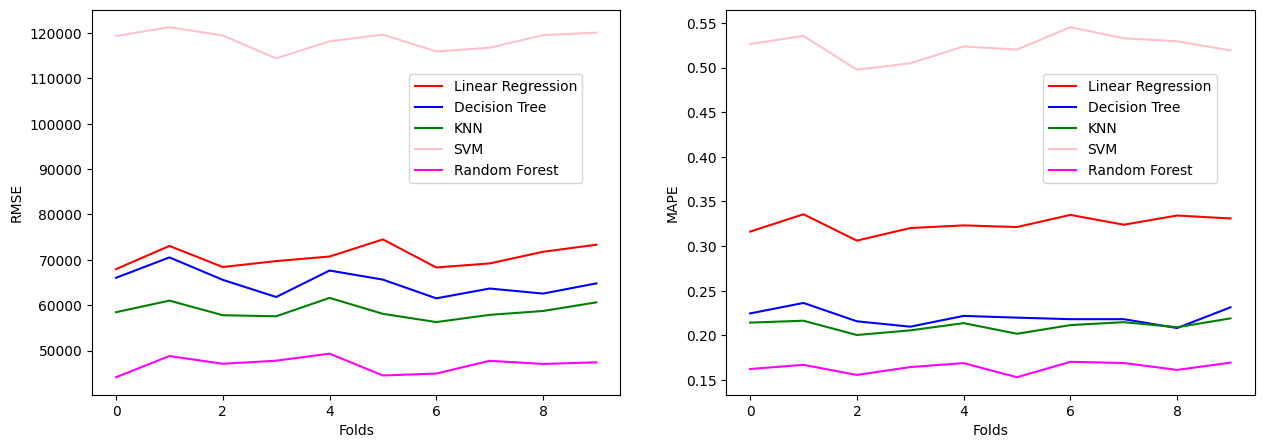

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(lin_reg_rmse, "red", label="Linear Regression")
ax1.plot(decision_tree_rmse, "blue", label="Decision Tree")
ax1.plot(knn_rmse, "green", label="KNN")
ax1.plot(svm_rmse, "pink", label="SVM")
ax1.plot(random_forest_rmse, "magenta", label="Random Forest")
ax1.legend(loc=(0.6,0.55))
ax1.set_xlabel("Folds")
ax1.set_ylabel("RMSE")

ax2.plot(lin_reg_mape, "red", label="Linear Regression")
ax2.plot(decision_tree_mape, "blue", label="Decision Tree")
ax2.plot(knn_mape, "green", label="KNN")
ax2.plot(svm_mape, "pink", label="SVM")
ax2.plot(random_forest_mape, "magenta", label="Random Forest")
ax2.legend(loc=(0.6,0.55))
ax2.set_xlabel("Folds")
ax2.set_ylabel("MAPE")
plt.show()